# 核心5, 2020.11.28, 石敏

## 使用客户购买预测数据进行keras二分类建模：
- 进行特征工程和机器学习部分一样
- 将特征工程后的数据进行归一化
- 使用keras进行建模
- 生成提交数据

NO	字段名称	数据类型	字段描述

1	ID	Int	客户唯一标识

2	age	Int	客户年龄

3	job	String	客户的职业

4	marital	String	婚姻状况

5	education	String	受教育水平

6	default	String	是否有违约记录  Yes/No

7	balance	Int	每年账户的平均余额

8	housing	String	是否有住房贷款  Yes/No

9	loan	String	是否有个人贷款  Yes/No

10	contact	String	与客户联系的沟通方式 Celulla/Telephone/Unknown

11	day	Int	最后一次联系的时间（几号）

12	month	String	最后一次联系的时间（月份）

13	duration	Int	最后一次联系的交流时长

14	campaign	Int	在本次活动中，与该客户交流过的次数

15	pdays	Int	距离上次活动最后一次联系该客户，过去了多久（999表示没有联系过）

16	previous	Int	在本次活动之前，与该客户交流过的次数

17	poutcome	String	上一次活动的结果 
    - unknown    20677
    - failure     2735
    - other       1070
    - success      835

18	y	Int	预测客户是否会订购定期存款业务


In [1]:
import pandas as pd
from keras.layers import Input, Dense
from keras import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import MLFrame as mlf

In [2]:
ml = mlf.MLearning()
ml.read_train('./input/train_set.csv')
ml.read_test('./input/test_set.csv')

The shape of train set：(25317, 18)
The shape of test set：(10852, 17)


In [3]:
ml.train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         25317 non-null  int64 
 1   age        25317 non-null  int64 
 2   job        25317 non-null  object
 3   marital    25317 non-null  object
 4   education  25317 non-null  object
 5   default    25317 non-null  object
 6   balance    25317 non-null  int64 
 7   housing    25317 non-null  object
 8   loan       25317 non-null  object
 9   contact    25317 non-null  object
 10  day        25317 non-null  int64 
 11  month      25317 non-null  object
 12  duration   25317 non-null  int64 
 13  campaign   25317 non-null  int64 
 14  pdays      25317 non-null  int64 
 15  previous   25317 non-null  int64 
 16  poutcome   25317 non-null  object
 17  y          25317 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 3.5+ MB


In [4]:
ml.test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10852 entries, 0 to 10851
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         10852 non-null  int64 
 1   age        10852 non-null  int64 
 2   job        10852 non-null  object
 3   marital    10852 non-null  object
 4   education  10852 non-null  object
 5   default    10852 non-null  object
 6   balance    10852 non-null  int64 
 7   housing    10852 non-null  object
 8   loan       10852 non-null  object
 9   contact    10852 non-null  object
 10  day        10852 non-null  int64 
 11  month      10852 non-null  object
 12  duration   10852 non-null  int64 
 13  campaign   10852 non-null  int64 
 14  pdays      10852 non-null  int64 
 15  previous   10852 non-null  int64 
 16  poutcome   10852 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.4+ MB


In [5]:
ml.train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous,y
count,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000
mean,12659.000000,40.935379,1357.555082,15.835289,257.732393,2.772050,40.248766,0.591737,0.116957
std,7308.532719,10.634289,2999.822811,8.319480,256.975151,3.136097,100.213541,2.568313,0.321375
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6330.000000,33.000000,73.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,12659.000000,39.000000,448.000000,16.000000,181.000000,2.000000,-1.000000,0.000000,0.000000
75%,18988.000000,48.000000,1435.000000,21.000000,317.000000,3.000000,-1.000000,0.000000,0.000000
max,25317.000000,95.000000,102127.000000,31.000000,3881.000000,55.000000,854.000000,275.000000,1.000000


In [6]:
ml.train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,43,management,married,tertiary,no,291,yes,no,unknown,9,may,150,2,-1,0,unknown,0
1,2,42,technician,divorced,primary,no,5076,yes,no,cellular,7,apr,99,1,251,2,other,0
2,3,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,unknown,0
3,4,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown,0
4,5,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown,0


In [7]:
ml.train['month'].value_counts()

may    7655
jul    3937
aug    3482
jun    2968
nov    2243
apr    1669
feb    1464
jan     777
oct     411
sep     339
mar     269
dec     103
Name: month, dtype: int64

In [8]:
ml.train[ml.train['pdays'] == -1]   #pdays里面有-1, 要改成999

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,43,management,married,tertiary,no,291,yes,no,unknown,9,may,150,2,-1,0,unknown,0
2,3,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,unknown,0
3,4,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown,0
4,5,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown,0
5,6,56,services,divorced,secondary,no,450,no,no,unknown,9,jun,47,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25308,25309,57,housemaid,married,tertiary,no,2326,no,no,cellular,17,apr,378,1,-1,0,unknown,1
25310,25311,24,management,single,tertiary,no,1,no,no,cellular,14,may,396,5,-1,0,unknown,1
25314,25315,35,blue-collar,divorced,primary,no,300,yes,no,unknown,13,may,945,2,-1,0,unknown,1
25315,25316,37,entrepreneur,divorced,tertiary,no,66,no,no,cellular,18,nov,1164,2,-1,0,unknown,1


### 合并训练和测试集

In [9]:

ml.add_label_for_test('y')
ml.merge_train_and_test()

### 数据清洗
#### day month是上次联系的月份和日期，但是没有年份字段。实际上，没有年份，月份的值就没有意义，因为你不能确定1月是否在2月的前面。所以，我假设，这是年尾进行的统计，把月份和日期一起转换成这一年的第几天。1月1日为0, 12月31日为365。以后，如果有年份的话， 最小的一日为0, 逐日增加。这个代码，实现在MLFrame中了。使用和不使用些列作为模型的特征，计算两次，看结果是否有影响，以评估假设的正确性。

In [10]:
ml.convert_day_in_year('month', 'day', 'last_talking')
ml.drop_column(['month', 'day'])
ml.data.head().T

,0,1,2,3,4
ID,1,2,3,4,5
age,43,42,47,28,42
job,management,technician,admin.,management,technician
marital,married,divorced,married,single,divorced
education,tertiary,primary,secondary,secondary,secondary
default,no,no,no,no,no
balance,291,5076,104,-994,2974
housing,yes,yes,yes,yes,yes
loan,no,no,yes,yes,no
contact,unknown,cellular,cellular,cellular,unknown


In [11]:
# 填充pdays, if -1 then 999
ml.data['pdays'] = ml.data.apply(lambda r: r['pdays'] if r['pdays'] != -1 else 999, axis=1)

In [12]:
# Label-Encode
cateFeatures = [f for f in ml.data.select_dtypes(object).columns if f not in ['ID', 'y']]
ml.label_encoder(cateFeatures)
# One-Hot
ml.one_hot(cateFeatures)

In [13]:
# Min_Min_Scaler
ml.min_max_scaler(['age', 'balance', 'duration', 'campaign', 'pdays', 'last_talking'])
ml.data.head().T

,0,1,2,3,4
ID,1.000000,2.000000,3.000000,4.000000,5.000000
age,0.324675,0.311688,0.376623,0.129870,0.311688
balance,0.075445,0.118888,0.073748,0.063779,0.099804
duration,0.038650,0.025509,0.019840,0.044834,0.048183
campaign,0.017544,0.000000,0.017544,0.017544,0.070175
pdays,1.000000,0.250501,1.000000,1.000000,1.000000
previous,0.000000,2.000000,0.000000,0.000000,0.000000
y,0.000000,0.000000,0.000000,0.000000,0.000000
last_talking,0.657382,0.746518,0.473538,0.462396,0.623955
job_0,0.000000,0.000000,1.000000,0.000000,0.000000


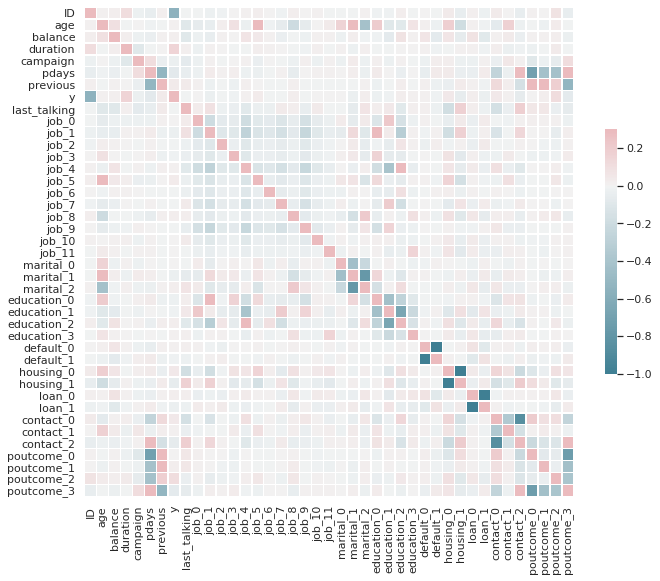

In [14]:
ml.corr_graph()

## 构建KERAS模型，实现二分类建模

In [15]:
data = ml.data
features = [f for f in data.columns if f not in ['ID', 'y']]
x = data[data['y'] >= 0][features]
y = data[data['y'] >= 0]['y']
testx = data[data['y'] < 0][features]

train_x, vali_x, train_y, vali_y = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
# 构建模型
def build_model(input_count):
    inputs = Input(shape=(input_count,))

    out = Dense(200, kernel_initializer='normal', activation='relu')(inputs)
    out = Dense(100, kernel_initializer='normal', activation='relu')(out)
    out = Dense(50, kernel_initializer='normal', activation='relu')(out)
    out = Dense(25, kernel_initializer='normal', activation='relu')(out)
    out = Dense(1,  kernel_initializer='normal', activation='sigmoid')(out)

    model = Model(inputs=inputs, outputs=out)

    model.compile(loss='mean_squared_error', optimizer=Adam())
    return model

keras = build_model(len(features))
keras.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 39)]              0         
_________________________________________________________________
dense (Dense)                (None, 200)               8000      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 26        
Total params: 34,451
Trainable params: 34,451
Non-trainable params: 0
__________________________________________________

In [17]:
keras.fit(train_x, train_y, batch_size=1024, epochs=100, verbose=1)

Epoch 1/100
18/18 [==============================] - 0s 9ms/step - loss: 0.2367
Epoch 2/100
18/18 [==============================] - 0s 9ms/step - loss: 0.1283
Epoch 3/100
18/18 [==============================] - 0s 13ms/step - loss: 0.1093
Epoch 4/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0975
Epoch 5/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0933
Epoch 6/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0907
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0892
Epoch 8/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0878
Epoch 9/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0863
Epoch 10/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0839
Epoch 11/100
18/18 [==============================] - 0s 11ms/step - loss: 0.0811
Epoch 12/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0778
Epoch 13/100
18/18 [=========

In [18]:
predict_vali_y = keras.predict(vali_x)
mean_squared_error(vali_y, predict_vali_y)

0.0802163016258235

In [19]:
result = ml.test[['ID']]
result['y'] = keras.predict(testx[features])
print(result.head().T)
result.to_csv('./output/custom_comssumption_result.csv', index=False)

               0             1             2             3             4
ID  25318.000000  25319.000000  25320.000000  25321.000000  25322.000000
y       0.457066      0.022428      0.047775      0.459913      0.014432


### 如上假设，去掉新回的列last_talking (from day and month), 测试结果

In [20]:
data = ml.data.drop(['last_talking'], axis=1)
features = [f for f in data.columns if f not in ['ID', 'y']]
x = data[data['y'] >= 0][features]
y = data[data['y'] >= 0]['y']
testx = data[data['y'] < 0][features]

train_x, vali_x, train_y, vali_y = train_test_split(x, y, test_size=0.3, random_state=42)
keras = build_model(len(features))
keras.fit(train_x, train_y, batch_size=1024, epochs=100, verbose=1)
predict_vali_y = keras.predict(vali_x)

Epoch 1/100
18/18 [==============================] - 0s 9ms/step - loss: 0.2365
Epoch 2/100
18/18 [==============================] - 0s 9ms/step - loss: 0.1271
Epoch 3/100
18/18 [==============================] - 0s 10ms/step - loss: 0.1083
Epoch 4/100
18/18 [==============================] - 0s 14ms/step - loss: 0.0974
Epoch 5/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0940
Epoch 6/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0917
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0900
Epoch 8/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0886
Epoch 9/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0875
Epoch 10/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0857
Epoch 11/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0817
Epoch 12/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0767
Epoch 13/100
18/18 [=============

In [21]:
mean_squared_error(vali_y, predict_vali_y)

0.07854500501821106


## 结论：感觉结果不太对的样子，和我想的不一样。也就是说month和day，我的处理方式是错误的？？。。。